# <center> Data Pipeline with Airflow</center>

## <center> by

# <center> Ayotunde Oyewole

## Executive Summary
Some methods of carrying out ETL tasks have been explored in previous projects. This project adds one for arrow the the ETL quiver by enabling the scheduling of various ETL tasks. A data pipeline will be built using airflow. The specific tasks to be carried out include downloading a zipped file from a given URL, extracting data of different formats from the zipped file, extracting only the needed subsets of the files and transforming part of the data as required. The scheduling of these tasks are automated with Apache Airflow and set to run daily. This report describes the whole process of creating and scheduling the task. The results of the ETL process is presented in screenshots. In line with proper data pipeline practice, all steps of the ETL process are carried out in their own seperate folders.

## Preliminary Steps
Apache Airflow has previously been installed in the Ubuntu environment. A folder named 'dags' is created in the Airflow and the python file for this project is created and saved in this folder. Afterwards, the dag is instantiated in the python file by defining the relevant variables including the dag_id, schedule, start date and so on. A rety delay is set for 3 minutes and it is set to retry only once. VS code is the editor used for this project. BashOperator was imported for this task, as I elected to use bash commands for all the tasks.

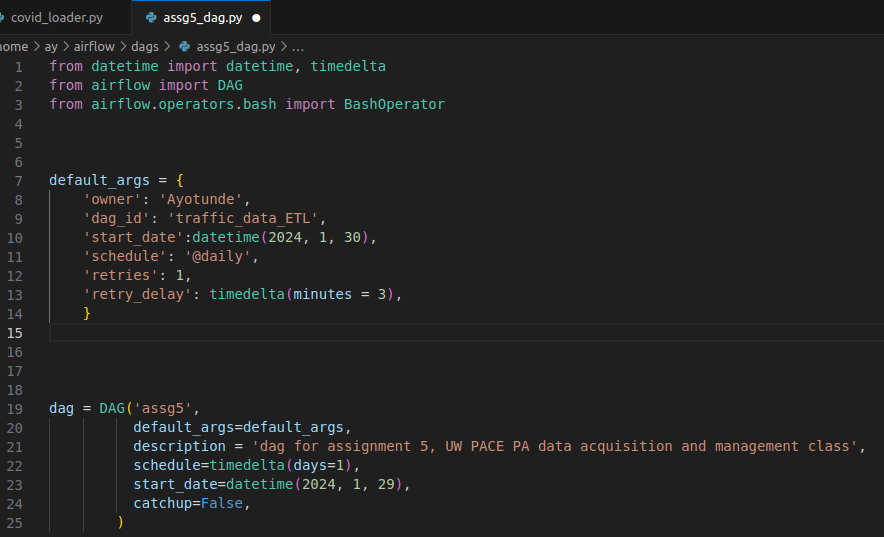

## Task 1 - Directory Creation
This is the first task of the project. All directories used in the project were created in the assignment_5 parent directory. The folders created included zipped_file, unzipped_files, data_extract, merged_data, transformed_data. Bash command mkdir was used to create all the directories in one line of code. A challenge encountered at this step was the long line of code which could not be splitted into multiple lines. Three quotes (''') and escape characters were attempted, but not successfully. Eventually, the code was returned to a long single line.
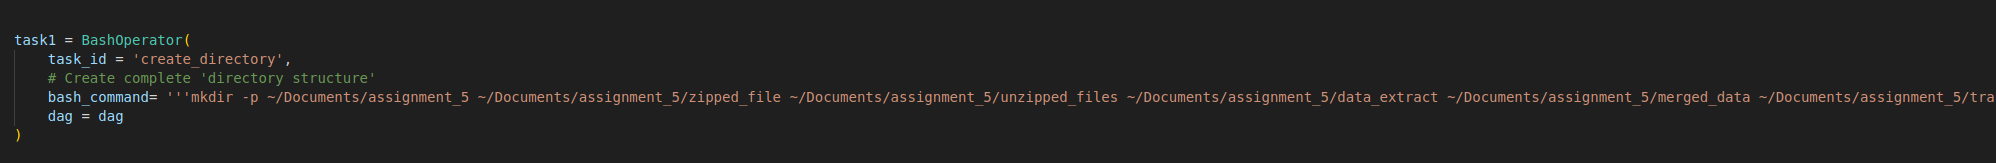

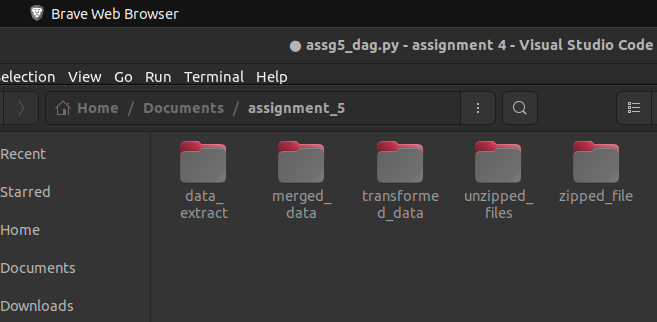

## Task 2 - File Download
This task, with id 'download' in the dag script was used to download the zipped (.tgz) file from the url provided and save it to the zipped_file directory. The URL was saved as a global variable. The variable was then accessed from the bash command using a f-string.
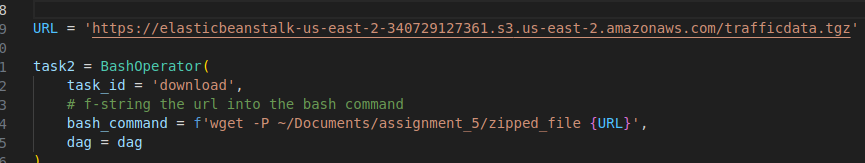

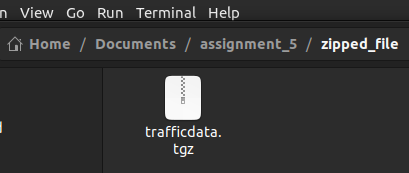


## Task 3 - File Extraction
Bash tar command was used to extract the content of the previously downloaded trafficdata.tgz. The contents of the extraction were saved in another directory called unzipped. The zipped file was found to contain payment-data.txt, tollplaza-data.tsv, vehicle-data.csv and a txt file that explains the file formats and headers of the other three files.
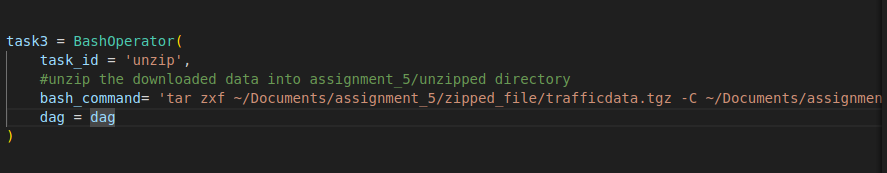

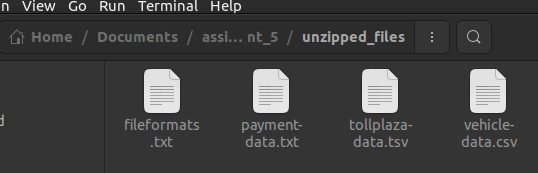


## Task 4 - CSV Extraction
The csv file vehicle-data.csv was the easiest to work with. Since it is a comma seperated file, it was easy to pass the delimiter into the cut command and specify the columns to be extracted - 1,2,3,4 corresponding to the columns for Rowid, Timestamp, Anonymized Vehicle Number, and vehicle type. The extracted data was saved to a new csv file called csv_d.csv in a folder folder named data extract. The first ten rows of the csv_d is shown in the second screenshot below.

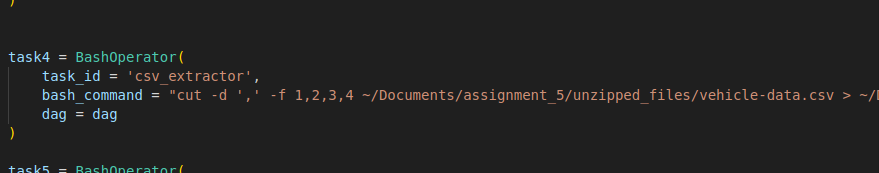

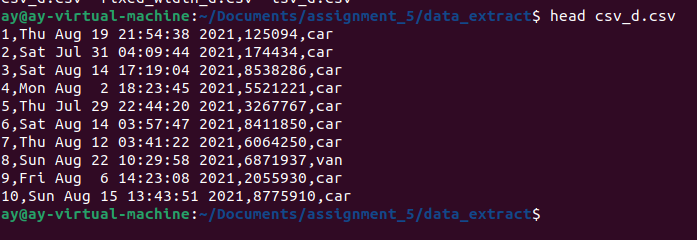


## Task 5 - TSV Extraction
Some required columns were extracted from the tab seperated data - tollplaza-data.tsv. Similar to extracting from a csv file, the cut command was used to extract the required columns - 5,6,7 representing Number of axles, Tollplaza id and Tollplaza code. The extracted data was saved to a csv file called tsv_d.csv. No delimiter was used in the code becuase the cut command had 'tab' as its default delimiter. The top ten records for the extracted file is shown in the second screenshot below.  
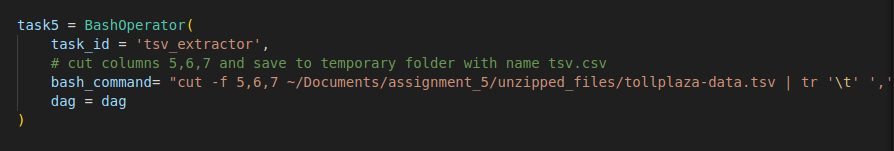

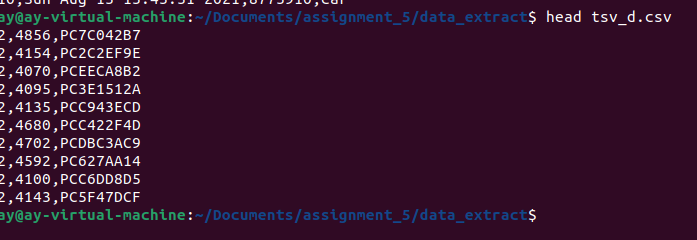

## Task 6 - TXT Extraction
A fixed width value data - payment-data.txt in txt format was part of the data to be extracted from. Type of payment code and vehicle code were the two columns extracted from this txt file. A different bash command - awk was used to identify the 10th and 11th columns in the file and then write their content to fixed_width_d.csv. To count of the 10/11 columns in both cases, every space represents the next column, since it is a fixed width seperated data. Screenshot of the top 10 records is shown below.

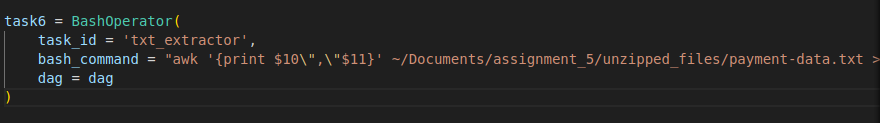

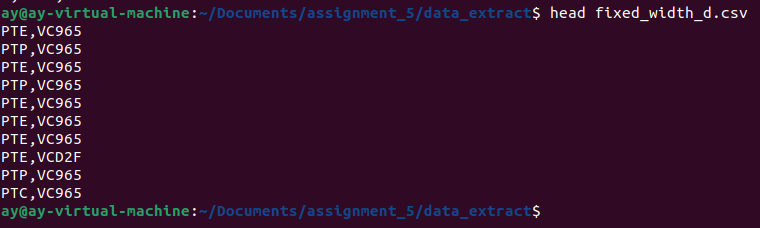


## Task 7 - Document Merger
This step, with id 'csv_merger' was a task to merge all the csv files into one, along their columns. Bash paste command was used for this task. At first attempt, the file was not well formated with the right delimiter (Screenshot 1 below). To resolve this, the tr command was included to the bash command for task 5 to trim off the tab and replace with comma. The delimiter argument was then introduced to the paste command for this task and that resulted in a properly formatted document (Screenshot3 below).

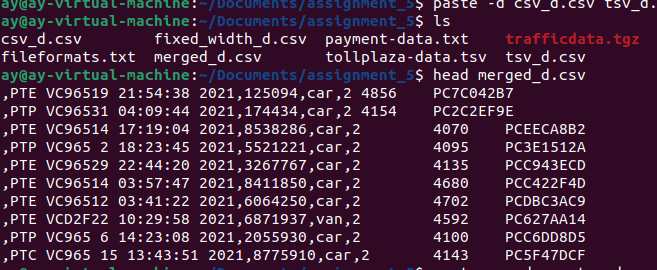

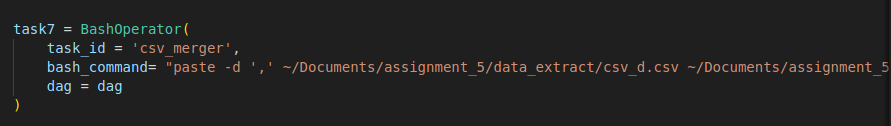


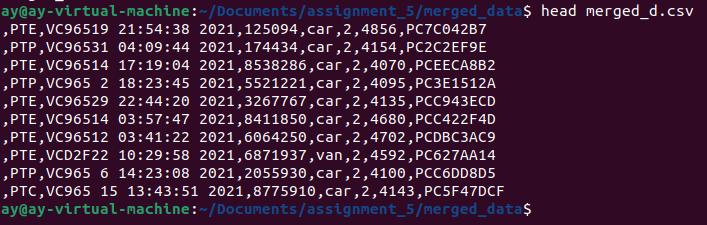

## Task 8 - Transformer
The final task on this project was to transform the fourth column (vehicle type) to uppercase. This was accomplished by a mix of awk command and toupper command. The data with one column converted to uppercase was written to transformed_data directory and named transformed.csv.

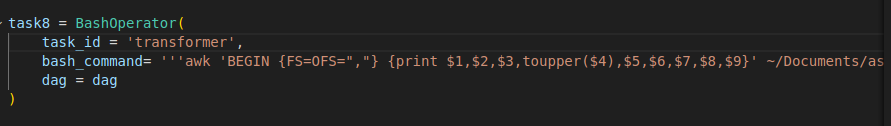

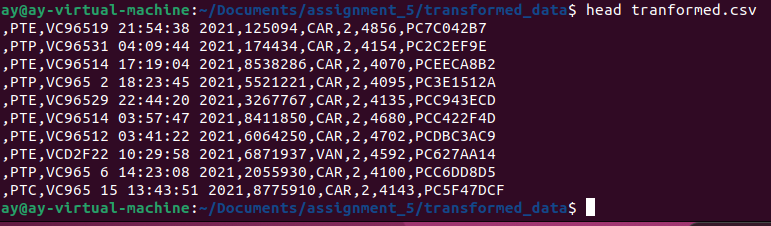

## Rounding Up
The pipeline dependencies were defined and tasks 4, 5, and 6 were set to run in parallel. After this, the modifications on the python file were saved and executed from vscode to identify and amend errors, if any exists.

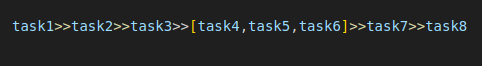

Airflow was started using 'airflow standalone' and the from the local host URL, the DAG was triggered. It is noteworthy that there were some unsuccessful trigger attempts (failed at certain points in the pipeline). These failures were painstakingly addressed through a review of the logs. Additional screenshots from the airflow interface showing various aspects of the triggered dag are shown below.

### Graph of the DAG's dependencies from Airflow
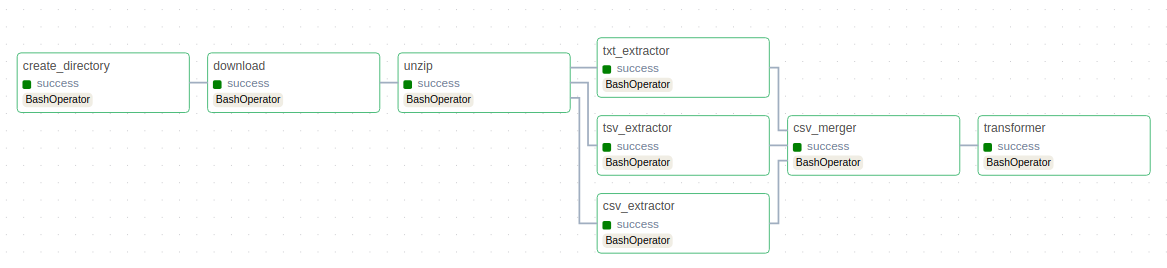

### Gantt chart of the most recent execution of the DAG
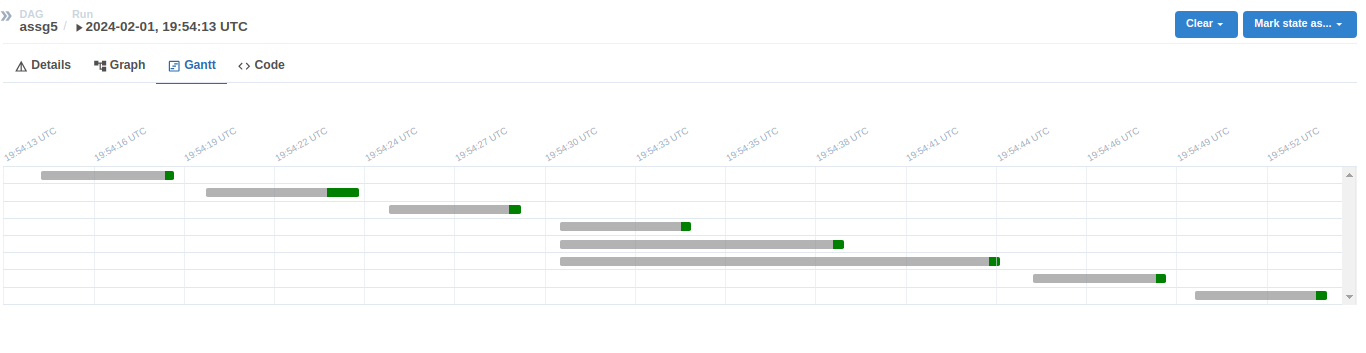

### Some failed executions before successful activations
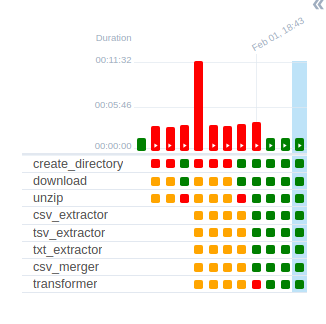

### A few logs
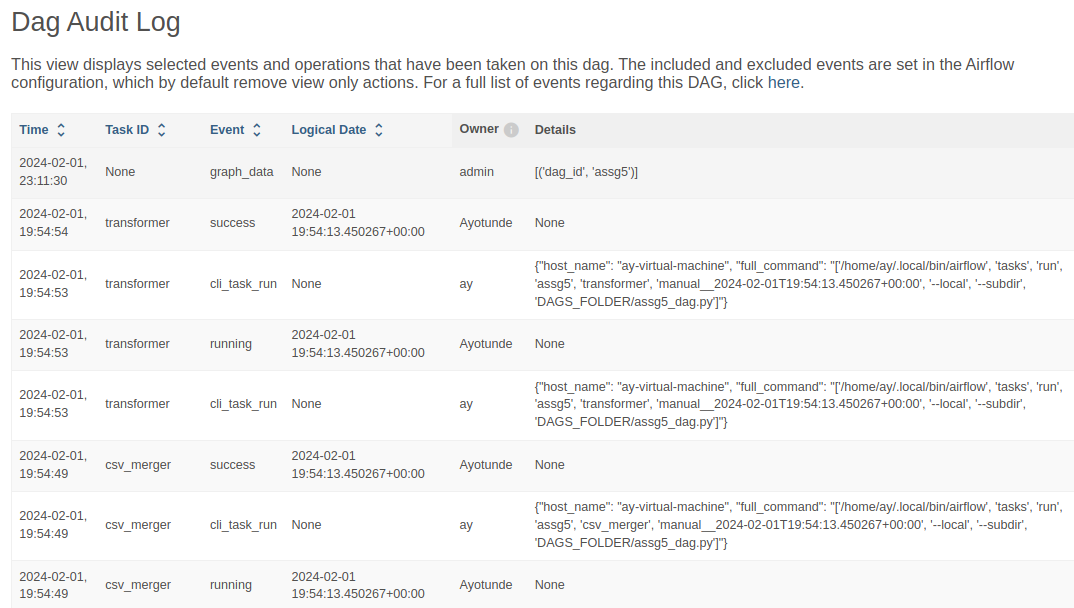

### Specific log of one of the failed tasks
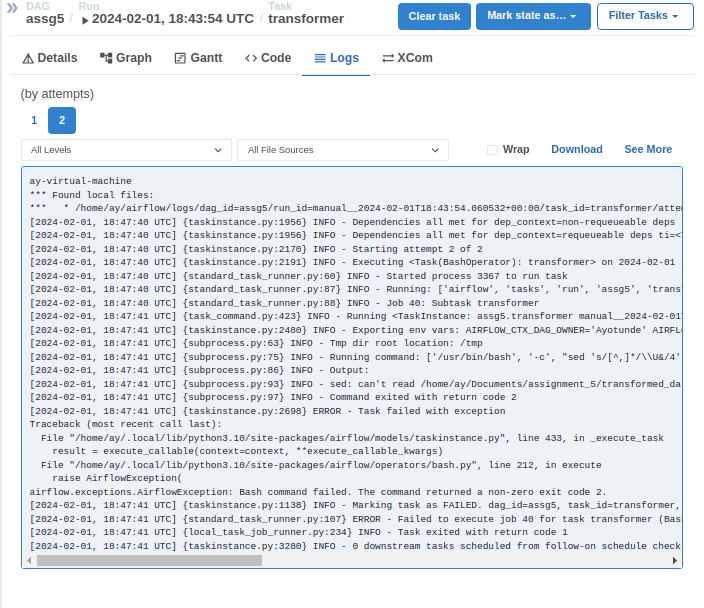

## Conclusion
Creating and maintaining data pipelines is a core skill of a Data Engineer. One of the ways of expressing this skill is in being able to create and deploy an ETL pipeline using Apache airflow. This project uses airflow to automate the scheduling of an ETL process consisting of eight tasks. It is scheduled to run daily and bash commands were used to carry out all the tasks in this project. The screenshots of all the steps from DAG creation to activation has been shown in this report.